# Model For the Stroke **Prediction** *italicized text*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extracting the data

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

In [ ]:
data.shape

(5110, 12)

# Prepeocessing the data

Checking for the null value

In [ ]:
print(data.isnull().sum().sum()) # yes it had
print(data.isnull().sum())       # feature wise null value

201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Removing the null values

In [ ]:
data["bmi"].fillna(data["bmi"].mean(),inplace=True) # by filling the null values with the mean of feature 

# Column Description
id: unique identifier
gender: "Male", "Female" or "Other"
age: age of the patient
hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
ever_married: "No" or "Yes"
work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
Residence_type: "Rural" or "Urban"
avg_glucose_level: average glucose level in blood
bmi: body mass index
smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Visualisation

Gender Vs Stroke

Unique values
 ['Male' 'Female' 'Other']

Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



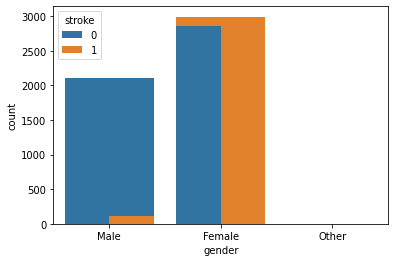

In [ ]:
print('Unique values\n',data['gender'].unique())
print()
print('Value Counts\n',data['gender'].value_counts()) # Above codes will help to give us information about it's unique values and count of each value.
print()
sns.countplot(data=data,x='gender')                  # Helps to plot a count plot which will help us to see count of values in each unique category.
sns.countplot(data=data,x='gender',hue='stroke')     # This plot will help to analyze how gender will affect chances of stroke.


# Age Vs Stroke
Well here age is just not a number, it’s one of the significant or as we can say it’s a very crucial factor. Let’s analyze our data and see how much impact actual impact it has.

Age and Stroke


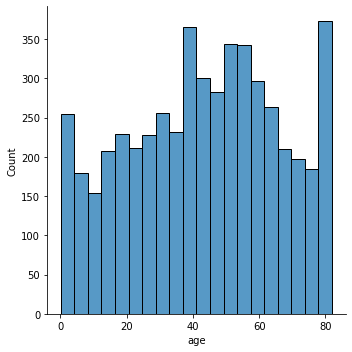

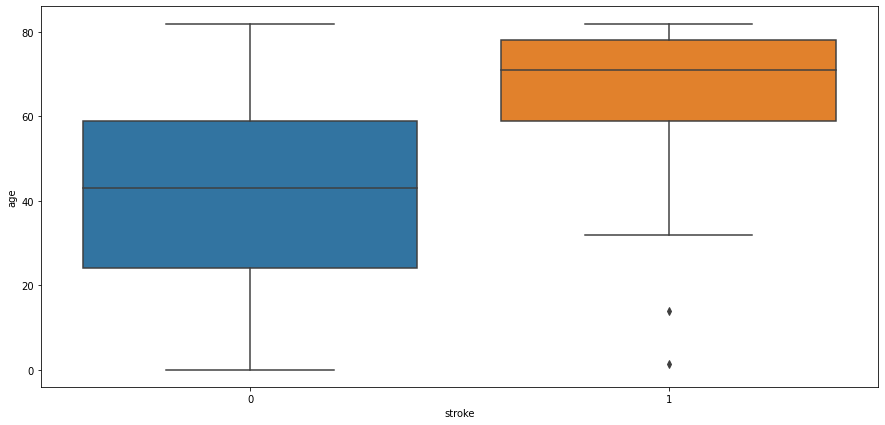

In [ ]:
data['age'].nunique()                    # Returns number of unique values in this attribute

sns.displot(data['age'])                 # This will plot a distribution plot of variable age

plt.figure(figsize=(15,7))
print("Age and Stroke")
sns.boxplot(data=data,x='stroke',y='age')# Above code will plot a boxplot of variable age with respect of target attribute stroke


Hypertension is a condition when a person has high blood pressure. Hypertension might result in a stroke. Let’s see how it goes.

Hypertension vs Stroke

Unique values
 [0 1]

Value Counts
 0    4612
1     498
Name: hypertension, dtype: int64



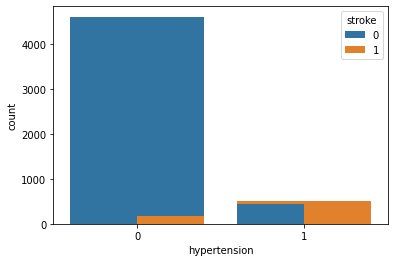

In [ ]:
print('Unique values\n',data['hypertension'].unique())
print()
print('Value Counts\n',data['hypertension'].value_counts())# Above codes will help to give us information about it's unique values and count of each value.

print()
sns.countplot(data=data,x='hypertension')                 # Helps to plot a count plot which will help us to see count of values in each unique category.

sns.countplot(data=data,x='hypertension',hue='stroke')    # This plot will help to analyze how gender will affect chances of stroke.


# Heart Disease
People having heart disease tends to have a higher risk of having a stroke if proper care is not taken.

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


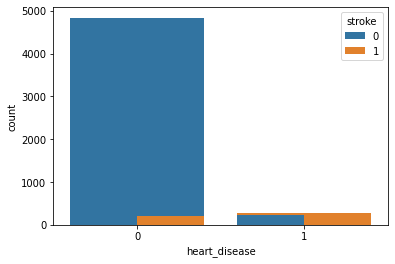

In [ ]:
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts()) # Above code will return unique value for heart disease attribute and its value counts
sns.countplot(data=data,x='heart_disease')
sns.countplot(data=data,x='heart_disease',hue='stroke')     # Will plot a counter plot of variable heart diseases


# Work Type
This attribute contains data about what kind of work does the patient. Different kinds of work have different kinds of problems and challenges which can be the possible reason for excitement, thrill, stress, etc. Stress is never good for health, let’s see how this variable can affect the chances of having a stroke.

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


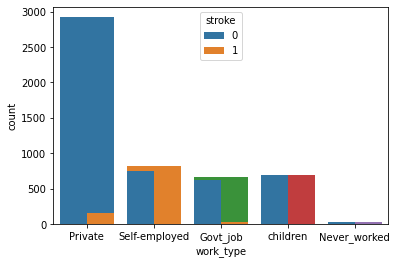

In [ ]:
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts()) # Above code will return unique values of attributes and its count
sns.countplot(data=data,x='work_type')                   # Above code will create a count plot
sns.countplot(data=data,x='work_type',hue='stroke')      # Above code will create a count plot with respect to stroke


# Average Glucose Level
Tells about the average glucose level in the patient’s body. Let’s see whether this affects the chances of having a stroke

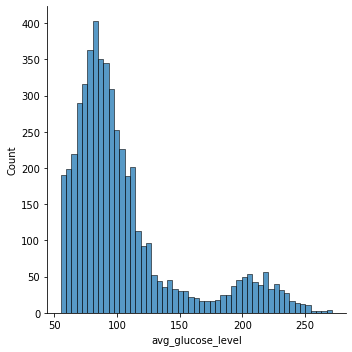

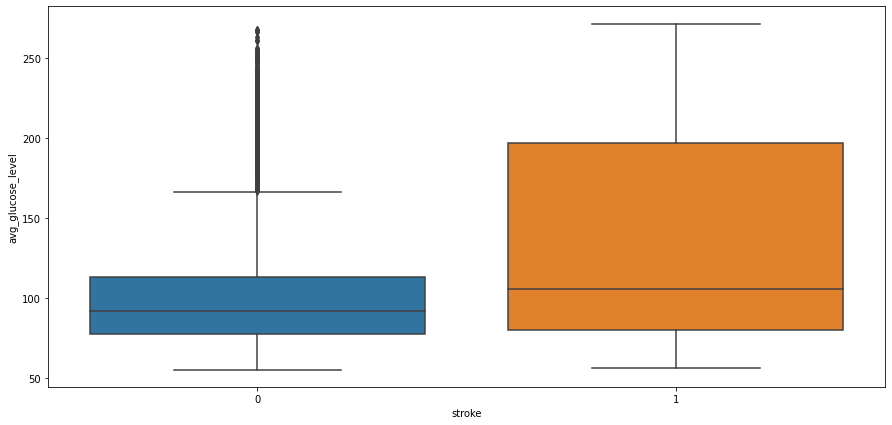

In [ ]:
data['avg_glucose_level'].nunique()                    # Number of unique values
sns.displot(data['avg_glucose_level'])
plt.figure(figsize=(15,7))                             # Distribution of avg_glucose_level
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')# Avg_glucose_level and Stroke


# BMI
Body Mass Index is a measure of body fat based on height and weight that applies to adult men and women. Let’s see how does it affect the chances of having a stroke.

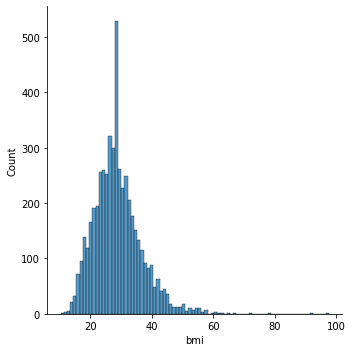

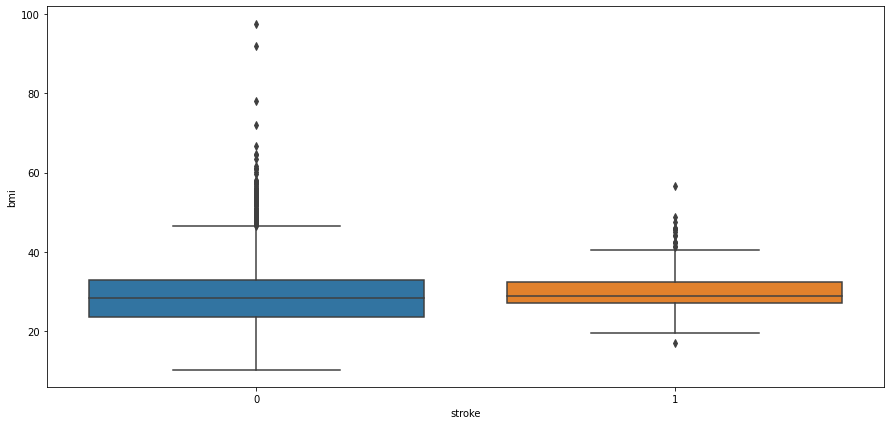

In [ ]:
data['bmi'].nunique()                      # Returns number of unique values in that attribute
sns.displot(data['bmi'])
plt.figure(figsize=(15,7))                 # Distribution of bmi
sns.boxplot(data=data,x='stroke',y='bmi')  # BMI with respect to Stroke



# Smoking Status
These attributes tell us whether or not the patient smokes. Smoking is injurious to health and may cause cardiac disease. Let’s see how it turns out in the case of our data.

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


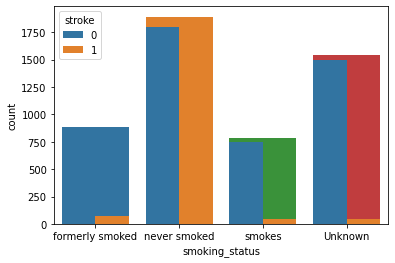

In [ ]:
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())   # Returns unique values and its count
sns.countplot(data=data,x='smoking_status')                     # Count plot of smoking status
sns.countplot(data=data,x='smoking_status',hue='stroke')        # Smoking Status with respect to Stroke


In [ ]:
                    # Agian checking for the null value
data.isnull().sum() # zero output shows us that it don't have any null value

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# categorical Encoding

In [ ]:
# information about each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
list1=data.select_dtypes(object).columns
list1

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
scaler=LabelEncoder()
for i in list1:
  data[i]=scaler.fit_transform(data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


# Scaling the dataset

In [ ]:
list2=['id','age','work_type','avg_glucose_level','bmi','smoking_status']
scaling=MinMaxScaler()
for i in list2:
  data[[i]]=scaling.fit_transform(data[[i]])

# Plotting the Graph using Heatmap


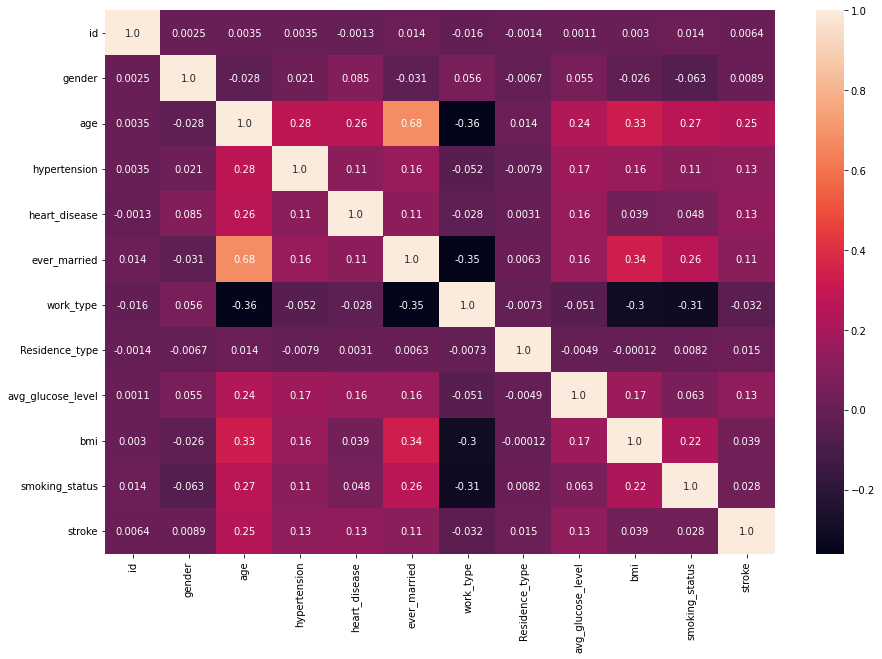

In [ ]:
plt.figure(figsize=(15,10))                 # plotting the heat map to see the dependency of one feature over other 
sns.heatmap(data.corr(),annot=True,fmt='.2')


In [ ]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
2,age,326.916568
4,heart_disease,94.698406
8,avg_glucose_level,90.503870
3,hypertension,84.953542
5,ever_married,60.667230
9,bmi,7.759776
6,work_type,5.340019
10,smoking_status,4.043033
7,Residence_type,1.220842
1,gender,0.407266


In [ ]:
X=data.iloc[:,:-1]  # non- targeted data
y=data.iloc[:,-1]   # targeted data

# Let's pick 5 most popoular classifiers, train they and pick 2-3 for hyperparameter tuning:
    1. XGB Classifier
    2. Random Forest
    3. KNeighborsClassifier
    4. GradientBoostingClassifier
    5. LGBMClassifier

In [ ]:
def avg_score(X,y): 
  dictionary={}
  scr_classifier=[]
  scr_classifier.append(LogisticRegression(random_state = 3))
  scr_classifier.append(SVC(random_state=3))  
  scr_classifier.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=3)))
  scr_classifier.append(RandomForestClassifier(random_state=3))
  scr_classifier.append(GradientBoostingClassifier(random_state=3))
  scr_classifier.append(KNeighborsClassifier())
  scr_classifier.append(XGBClassifier())
  
 
  for i in scr_classifier:
    score=cross_val_score(i,X,y).mean()
    dictionary[i]=score  
  return dictionary   


In [ ]:
date=avg_score(X,y)
date

{AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=3)): 0.9027397260273974,
 GradientBoostingClassifier(random_state=3): 0.9475538160469668,
 KNeighborsClassifier(): 0.9477495107632095,
 LogisticRegression(random_state=3): 0.9514677103718199,
 RandomForestClassifier(random_state=3): 0.9493150684931507,
 SVC(random_state=3): 0.9512720156555773,
 XGBClassifier(): 0.9500978473581213}

# Confusion Matrix

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

# XGBClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=3)

In [ ]:
obj=XGBClassifier(objective='binary:logistic',n_estimators=8000,max_depth=5,learning_rate=0.001,n_jobs=-1)
obj.fit(X_train,y_train)
pred=obj.predict(X_test)

In [ ]:
print(accuracy_score(pred,y_test))

0.9408023483365949


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1939
           1       0.21      0.06      0.09       105

    accuracy                           0.94      2044
   macro avg       0.58      0.52      0.53      2044
weighted avg       0.91      0.94      0.92      2044



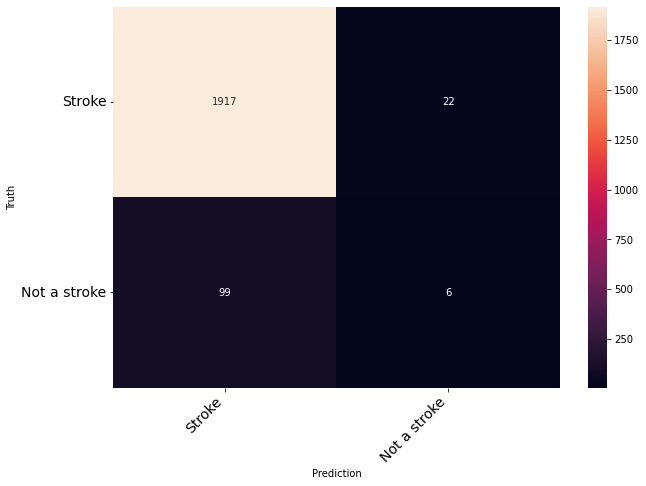

In [ ]:
cm = confusion_matrix(y_test,pred)
print_confusion_matrix(cm,["Stroke","Not a stroke"])

# RandomForestClassifier

In [ ]:
parameters = {'n_estimators': [160,180,200,220], 'max_depth':[16,18,20,22,24]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)



GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [16, 18, 20, 22, 24],
                         'n_estimators': [160, 180, 200, 220]})

In [ ]:
print(f'Best Hyperparameters: {clf.best_params_}')

Best Hyperparameters: {'max_depth': 22, 'n_estimators': 180}


In [ ]:
y_predi=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predi))

0.9476516634050881


In [ ]:
print(classification_report(y_test,y_predi))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1939
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2044
   macro avg       0.47      0.50      0.49      2044
weighted avg       0.90      0.95      0.92      2044



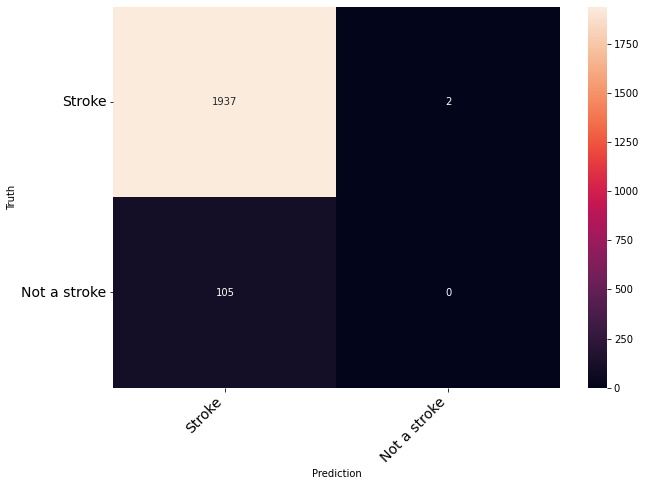

In [ ]:
cm = confusion_matrix(y_test,y_predi)
print_confusion_matrix(cm,["Stroke","Not a stroke"])

# KneighborsClassifer

In [ ]:
parameters = {'n_neighbors': [5,10,15,20]}
K_model = KNeighborsClassifier()
clf = GridSearchCV(K_model, parameters)
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')


Best Hyperparameters: {'n_neighbors': 15}


In [ ]:
y_prede=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_prede))

0.9486301369863014


In [ ]:
print(classification_report(y_test,y_prede))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1939
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2044
   macro avg       0.47      0.50      0.49      2044
weighted avg       0.90      0.95      0.92      2044



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


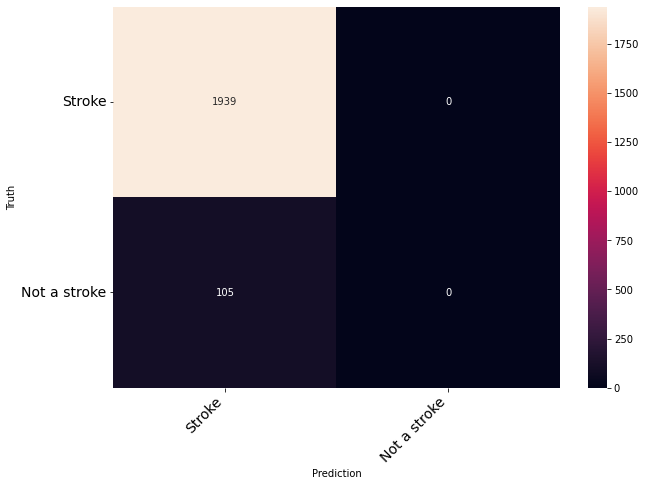

In [ ]:
cm = confusion_matrix(y_test,y_prede)
print_confusion_matrix(cm,["Stroke","Not a stroke"])

#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
parameter = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
clf=GradientBoostingClassifier()
clf = GridSearchCV(clf, parameter)
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}


In [ ]:
predi=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,predi))

0.9486301369863014


In [ ]:
print(classification_report(y_test,predi))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1939
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2044
   macro avg       0.47      0.50      0.49      2044
weighted avg       0.90      0.95      0.92      2044



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


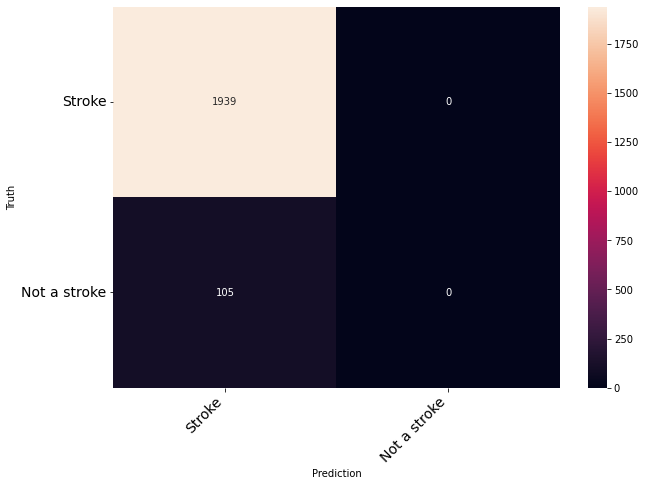

In [ ]:
cm = confusion_matrix(y_test,predi)
print_confusion_matrix(cm,["Stroke","Not a stroke"])

#Light GBM Classifier

In [ ]:
params={'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}
clf=LGBMClassifier()
clf=GridSearchCV(clf,params)
clf.fit(X_train,y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

Best Hyperparameters: {'bagging_fraction': 0.8, 'feature_fraction': 0.1, 'learning_rate': 0.01, 'max_bin': 20, 'max_depth': 5, 'min_data_in_leaf': 20, 'min_sum_hessian_in_leaf': 0, 'num_leaves': 24, 'subsample': 0.01}


In [ ]:
prid=clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,prid))

0.9486301369863014


In [ ]:
print(classification_report(y_test,prid))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1939
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2044
   macro avg       0.47      0.50      0.49      2044
weighted avg       0.90      0.95      0.92      2044



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


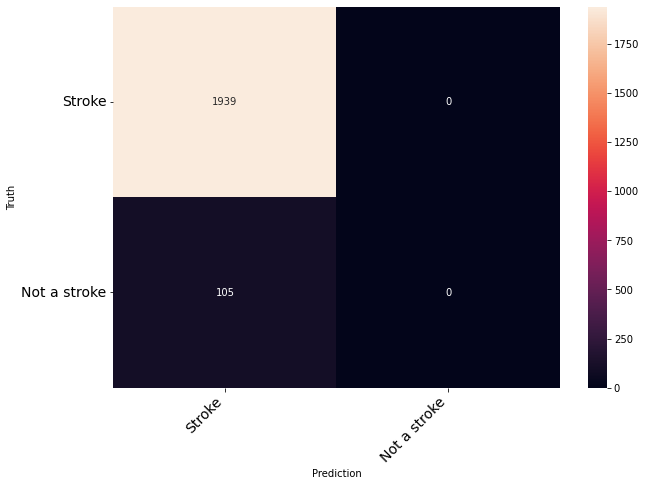

In [ ]:
cm = confusion_matrix(y_test,prid)
print_confusion_matrix(cm,["Stroke","Not a stroke"])